In [1]:
!pip install pyyaml h5py

In [2]:
# preparaing the dataset
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [4]:
# train data generator
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/dataset/set1/train',
    target_size=(image_size, image_size),
    batch_size=50,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
        

Found 5000 images belonging to 10 classes.


In [5]:
# validation data
validation_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/dataset/set1/validation',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 10 classes.


In [ ]:
# test data
test_generator = data_generator.flow_from_directory(
    "/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/test",
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 10 images belonging to 1 classes.


In [ ]:
test2_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/valid',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 20 images belonging to 10 classes.


In [6]:
# creating model for training
from keras.applications.vgg16 import VGG16
vgg16_weights = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg16_model = VGG16(include_top=False, pooling='avg', weights=vgg16_weights)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
num_classes = 10
new_model = Sequential()
new_model.add(vgg16_model)
new_model.add(Dense(num_classes, activation='softmax'))

new_model.layers[0].trainable = False
new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# training the model
Step_size_train = train_generator.n // train_generator.batch_size
Step_size_valid = validation_generator.n // validation_generator.batch_size

history = new_model.fit(
    train_generator,
    steps_per_epoch=Step_size_train,
    validation_data=validation_generator,
    validation_steps=Step_size_valid,
    epochs=30,
    verbose=1
)

Epoch 1/30
 53/100 [==============>...............] - ETA: 25:16 - loss: 4.1312 - accuracy: 0.5818

KeyboardInterrupt: ignored

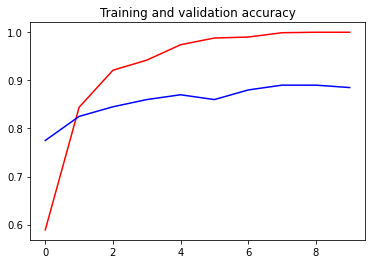

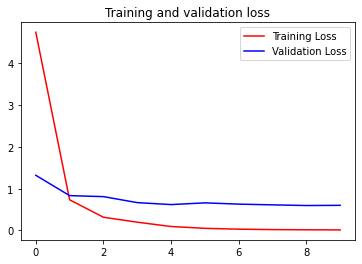

In [ ]:
# plotting the accuracy and loss curves woth epochs
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.legend()

plt.show()

In [ ]:
# evaluate the model
Step_size_test2 = test2_generator.n // test2_generator.batch_size
result = new_model.evaluate(test2_generator, steps=Step_size_test2)
print(result)
print(new_model.metrics_names)

20/20 [==============================] - 14s 711ms/step - loss: 0.0024 - accuracy: 1.0000
[0.0024143666960299015, 1.0]
['loss', 'accuracy']


In [ ]:
# saving the model
new_model.save('/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/models/vgg16_set2_val89_test2_90.h5')

In [ ]:
# making predictions with the model
classes = train_generator.class_indices
print(classes)
labels = {}
for k, v in classes.items():
    labels[v] = k

print(labels)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}
{0: 'butterfly', 1: 'cat', 2: 'chicken', 3: 'cow', 4: 'dog', 5: 'elephant', 6: 'horse', 7: 'sheep', 8: 'spider', 9: 'squirrel'}


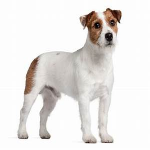

Predicted label cow 53.051942586898804
Predicted label dog 31.676888465881348
Predicted label horse 15.268237888813019




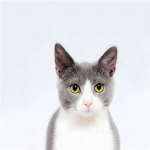

Predicted label cat 100.0
Predicted label dog 6.925379159028466e-08
Predicted label chicken 5.439004802099134e-09




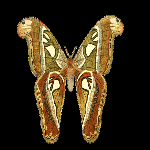

Predicted label butterfly 99.98319149017334
Predicted label sheep 0.014017969078850001
Predicted label elephant 0.00264182235696353




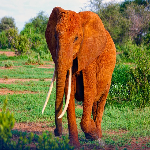

Predicted label elephant 99.99912977218628
Predicted label sheep 0.0008726284249860328
Predicted label cow 9.217389629334605e-08




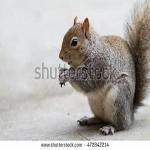

Predicted label squirrel 99.99479055404663
Predicted label cat 0.005208113725529984
Predicted label chicken 1.9807584461517536e-07




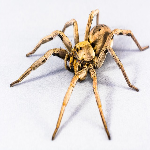

Predicted label spider 100.0
Predicted label butterfly 6.9725825218019e-14
Predicted label horse 4.878817131956164e-15




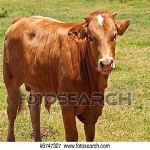

Predicted label cow 99.38850998878479
Predicted label horse 0.6114855874329805
Predicted label dog 2.488577573178663e-09




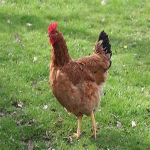

Predicted label chicken 100.0
Predicted label dog 1.4300480541900402e-13
Predicted label sheep 1.1124349221267356e-15




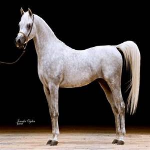

Predicted label horse 99.98869895935059
Predicted label cow 0.011000507947755978
Predicted label dog 0.00016607292536718887




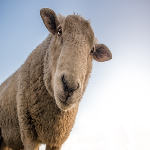

Predicted label sheep 100.0
Predicted label cow 1.3984527980070993e-07
Predicted label squirrel 2.851402924539115e-10




In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from PIL import Image 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

dog = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/dog.jpeg'
cat = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/cat.jpeg'
butterfly = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/butterfly.jpeg'
elephant = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/elephant.jpeg'
squirrel = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/squirrel.jpeg' 
spider = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/spider.jpeg'
cow = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/cow.jpeg'
chicken = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/chicken.jpeg'
horse = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/horse.jpeg'
sheep = '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/basic_images/sheep.jpeg'

imgs = [dog, cat, butterfly, elephant, squirrel, spider, cow, chicken, horse, sheep]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

for img_path in imgs:
    img = _load_image(img_path)
    
    imag = cv2.imread(img_path)
    imag = cv2.resize(imag, (150, 150))
    cv2_imshow(imag)

    pred = new_model.predict(img)
    pred = pred.flatten()
    for i in range(0, 3):
        prediction = np.argmax(pred)
        print(f'Predicted label {labels[prediction]} {pred[prediction] * 100}')
        pred[prediction] = -1

    print('\n')
    

In [ ]:
# # another way to make predictions
# from keras.applications.vgg16 import decode_predictions
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# test_generator.reset()
# preds = new_model.predict(test_generator, steps=STEP_SIZE_TEST, verbose=1)
# predicted_class_indices=np.argmax(preds,axis=1)
# predictions = [labels[k] for k in predicted_class_indices]
# print(predictions)

In [ ]:
# testing with completely new sets
# test data
test_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/validation sets/validation3',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 200 images belonging to 10 classes.


In [ ]:
from keras.models import load_model
mymodel = load_model('/content/drive/MyDrive/Google Colab Notebooks/DMW/Project Code/models/Img1000/vgg16/vgg16_set2_val89_test2_90.h5')

In [ ]:
# evaluate the model
print("Evaluating the model")
Step_size_test = test_generator.n // test_generator.batch_size
result = mymodel.evaluate(test_generator, steps=Step_size_test)
print(result)
print(mymodel.metrics_names)
print(f"Accuracy for validation set3 {result[1]}")
print(f"Loss for validation set3 {result[0]}")

Evaluating the model
200/200 [==============================] - 105s 523ms/step - loss: 1.3962 - accuracy: 0.8050
[1.3962434530258179, 0.8050000071525574]
['loss', 'accuracy']
Accuracy for validation set3 0.8050000071525574
Loss for validation set3 1.3962434530258179
